# **🧬 COVID-19 VACCINATION PROGRESS IN WORLD, ASEAN NATIONS AND INDIA 💉**

###**Importing libraries**




In [69]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly import subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from copy import deepcopy
import numpy as np
import pandas as pd

##**World Vaccination Progress**

###**Loading Data Set**

In [70]:
df = pd.read_csv("/content/country_vaccinations(original).csv")

### `**1. Data Cleaning**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12514 entries, 0 to 12513
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12514 non-null  object 
 1   iso_code                             12514 non-null  object 
 2   date                                 12514 non-null  object 
 3   total_vaccinations                   7476 non-null   float64
 4   people_vaccinated                    6811 non-null   float64
 5   people_fully_vaccinated              4901 non-null   float64
 6   daily_vaccinations_raw               6285 non-null   float64
 7   daily_vaccinations                   12297 non-null  float64
 8   total_vaccinations_per_hundred       7476 non-null   float64
 9   people_vaccinated_per_hundred        6811 non-null   float64
 10  people_fully_vaccinated_per_hundred  4901 non-null   float64
 11  daily_vaccinations_per_milli

In [72]:
df['iso_code'] = df['iso_code'].fillna('GBR')

####Colums to drop

In [73]:
df = df.drop('daily_vaccinations_raw', axis=1)

####Transformation of Data

In [74]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)

df['date'] = df['date'].dt.strftime('%d-%m-%Y')


In [75]:
unique_dates = df['date'].unique()


In [76]:
original_df = df.copy()

In [77]:
for iso_code in df['iso_code'].unique():
    for inc_date in unique_dates:
        if df.loc[df['iso_code'] == iso_code, 'date'].str.contains(inc_date).any():
            continue
        else:
            df.loc[len(df)] = [None, iso_code, inc_date] + 11 * [None]

In [78]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)

df['date'] = df['date'].dt.strftime('%m-%d-%Y')

df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1882,Canada,CAN,12-14-2020,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
19321,None,BHS,12-14-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
13641,None,OWID_WLS,12-14-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
13662,None,BOL,12-14-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
19226,None,FJI,12-14-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [79]:
tdf = df.copy()


for iso_code in tdf['iso_code'].unique():
    tdf.loc[tdf['iso_code'] == iso_code, :] = tdf.loc[tdf['iso_code'] == iso_code, :].fillna(method='ffill').fillna(0)



###****Visualisation of data****

In [80]:
#@title World vaccination progress

fig = px.choropleth(
    tdf,                            # Input Dataframe
    locations="iso_code",           # identify country code column
    color="total_vaccinations",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_frame="date",
    #category_orders={"frame": list(sorted(tdf['date'].unique()))},            # identify date column
    color_continuous_scale= 'viridis',
    projection="natural earth",        # select projection
    range_color=[0,5000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Number of vaccinations per country</span>',
)             # select range of dataset     
fig.show() 


**Insight**

Since the World Health Organization (WHO) declared the COVID-19 outbreak a pandemic back in March 2020, the virus has claimed more than 2.5 million lives globally with upwards of 113 million cases being confirmed by laboratory tests (March 2021).

The pandemic has impacted almost every corner of life, causing global economies to stall, changing the way we work and interact with our loved ones, and stretching healthcare systems to the limit. Governments around the world have been forced to implement harsh restrictions on human activity to curb the spread of the virus.
COVID-19 vaccination is now offering a way to transition out of this phase of the pandemic. Without them, many scientists believe that natural herd immunity would not have been sufficient to restore society to its normal status quo and that it would have resulted in extreme fatality. This is something that has been echoed by many health organizations including the WHO. In a scenario without access to vaccines, strict behavioral measures may have had to remain for the foreseeable future.

Fortunately, the beginning of 2021 saw numerous vaccines given emergency approval and begin their roll out in countries across the world. As of March 2021, just shy of 300 million vaccine doses had been administered worldwide. The figures give hope of a return to ‘normal’.

In [81]:
#@title Data Cleaning
df1 = df.drop(['iso_code', 'people_fully_vaccinated', 'total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines','source_name', 'source_website' ], axis=1)

###**Data Manipulation**

In [82]:
tdf = df.copy()
tdf = tdf.dropna(subset=['vaccines'])

vac_df = tdf.groupby(['iso_code','vaccines']).max().reset_index()
vac_df['vaccines_split'] = vac_df['vaccines'].apply(lambda x: [w.strip() for w in x.split(',')])


In [83]:
def format_number(number):
    return ("{:,}".format(number))

In [84]:
from plotnine import options as op
from plotnine import ggplot, aes, geom_col, coord_flip, scale_fill_manual, labs, theme, element_rect, element_blank, element_text, element_line

###**Highest vaccination**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning:

Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it



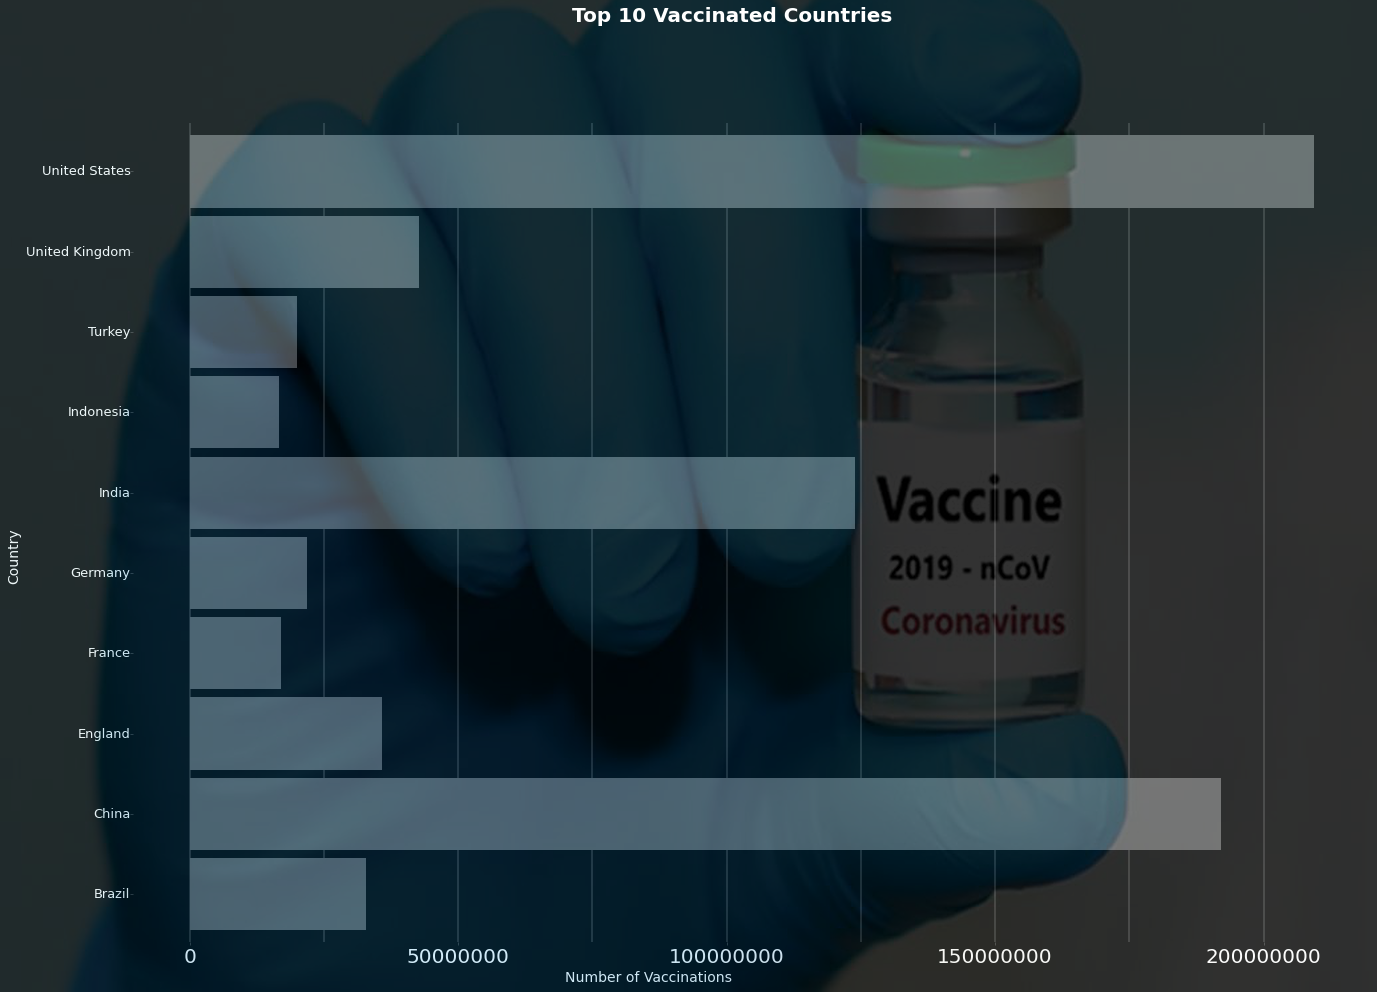

In [85]:
#@title Top countries vaccinated
top_20_countries_vaccinated = pd.DataFrame(df1.groupby("country")["total_vaccinations"].max().sort_values(ascending = False).head(10))
top_20_countries_vaccinated.reset_index(level=0,inplace=True)
# top_20_countries_vaccinated = convert_df_with_continent(top_20_countries_vaccinated)
top_20_countries_vaccinated['number_labels'] = ['']*top_20_countries_vaccinated.shape[0]

for i in range(top_20_countries_vaccinated.shape[0]):
    top_20_countries_vaccinated['number_labels'].iloc[i] = format_number(top_20_countries_vaccinated['total_vaccinations'].iloc[i])
    
op.figure_size=(8,5)
ax = (ggplot(top_20_countries_vaccinated)         
 + aes(x='country', y='total_vaccinations')    
 + geom_col(size=20)
#  + geom_label(aes(label = 'number_labels'),ha='right',color = "white",label_padding= 0.25)
 + coord_flip()
 + scale_fill_manual(values = ["#B21236","#F03812","#FE8826","#FEB914","#2C9FA2","#002C2B","#F7E1C0"])
 + labs(title = "Top 10 Vaccinated Countries")
 + labs(y = "Number of Vaccinations", x = "Country")
 + theme( panel_background = element_rect(fill = "black"),    
    plot_background = element_rect(fill = "black", color = "black"),
    legend_background = element_rect(fill = "black"),
    legend_key = element_blank(),
   
    panel_grid = element_line(size = 0.3),
    panel_grid_minor_y = element_blank(),
    panel_grid_major_y = element_blank(),
    
    legend_text = element_text(color = "white"),
    axis_text_x = element_text(color = "white", size = 20),
    axis_text_y = element_text(color = "white", size = 13, hjust = 1, margin={'b': 20, 't':10}),
    axis_title = element_text(color = "white", size = 14, hjust = 1),
    plot_title = element_text(color = "white", face = "bold", size = 20, hjust = 4, margin={'b': 20, 't':10}),
    panel_spacing_x = 1
  )
)

fig = ax.draw()

image = plt.imread('https://raw.githubusercontent.com/vineethbabu/coronavaccine_images/main/1_enlargev3.png')

fig.figimage(image, xo=0, yo=0, alpha=0.2, norm=None, cmap=None, vmin=None, vmax=None, origin=None, resize=True)

fig.show()

##**Asean nations analysis**

###**Data Cleaning**

In [86]:
dataFrame1 = pd.read_csv('/content/Asean Countries2.csv')

In [87]:
dataFrame1.set_index("date")

,Indonesia,Vietnam,Cambodia,Singapore,Malaysia,Thailand,Philippines,Myanmar,Brunei,Laos
date,,,,,,,,,,
12-01-2021,0,0,0,3400,0,0,0,0,0,NaN
13-01-2021,0,0,0,6200,0,0,0,0,0,NaN
14-01-2021,0,0,0,6200,0,0,0,0,0,NaN
15-01-2021,0,0,0,6200,0,0,0,0,0,NaN
16-01-2021,0,0,0,6200,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
14-04-2021,10457337,62028,1203636,1131658,653531,505744,1093651,1000000,2323,NaN
15-04-2021,10781266,63758,1223322,1131658,671589,510456,1093651,1000000,2323,NaN
16-04-2021,10781266,66366,1241947,1131658,687176,523830,1093651,1000000,2323,NaN


In [88]:
dataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         97 non-null     object 
 1   Indonesia    97 non-null     int64  
 2   Vietnam      97 non-null     int64  
 3   Cambodia     97 non-null     int64  
 4   Singapore    97 non-null     int64  
 5   Malaysia     97 non-null     int64  
 6   Thailand     97 non-null     int64  
 7   Philippines  97 non-null     int64  
 8   Myanmar      97 non-null     int64  
 9   Brunei       97 non-null     int64  
 10  Laos         1 non-null      float64
dtypes: float64(1), int64(9), object(1)
memory usage: 8.5+ KB


In [89]:

dataFrame1 = dataFrame1.set_index('date')
dataFrame2=dataFrame1.drop(['Laos'], axis=1)
s=dataFrame2.loc['15-04-2021']

###**Data Manipulation**

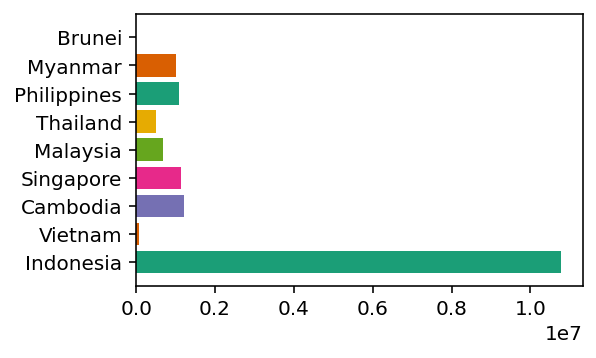

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
ax.barh(s.index, s.values, color=colors);

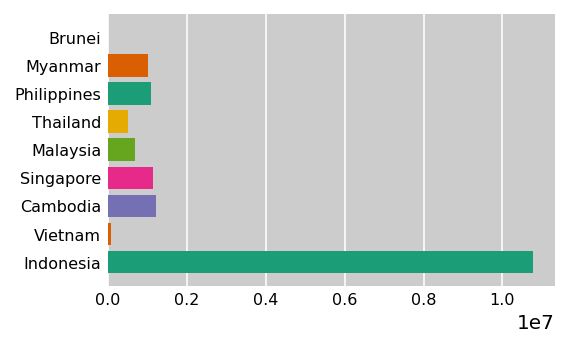

In [91]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

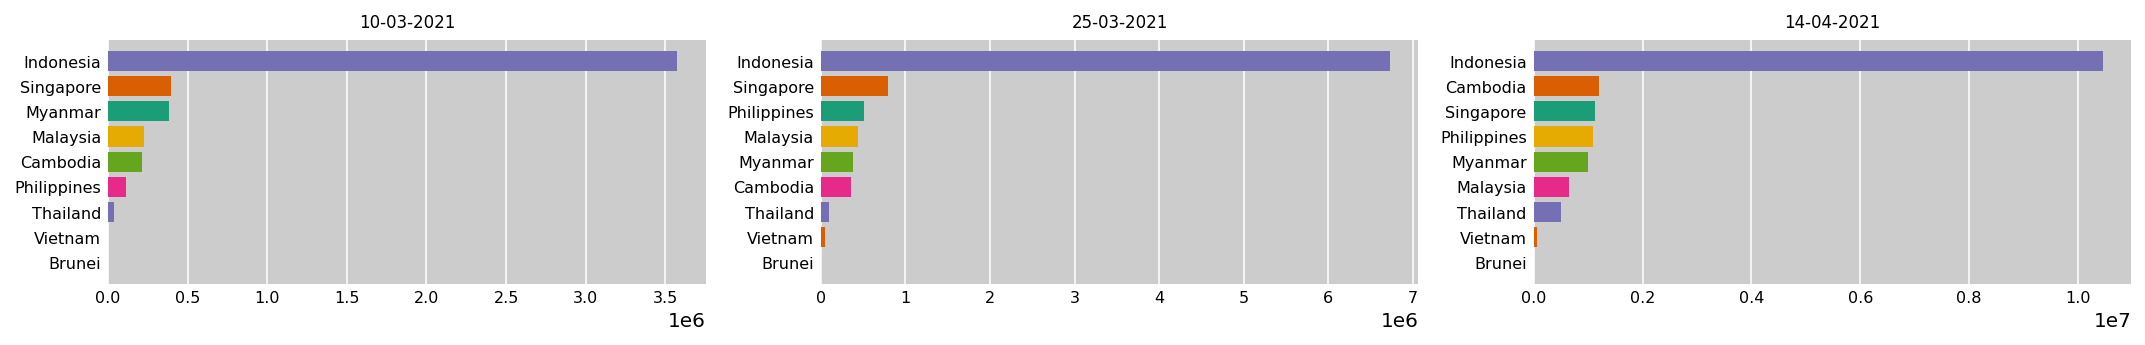

In [92]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(15, 2.5), dpi=144, tight_layout=True)
dates = ['10-03-2021', '25-03-2021', '14-04-2021']
for ax, date in zip(ax_array, dates):
    s = dataFrame2.loc[date].sort_values()
    ax.barh(s.index, s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)


In [93]:
dataFrame2_expanded = dataFrame2['22-01-2021': '18-04-2021']
dataFrame2_expanded


,Indonesia,Vietnam,Cambodia,Singapore,Malaysia,Thailand,Philippines,Myanmar,Brunei
date,,,,,,,,,
22-01-2021,132000,0,0,6200,0,0,0,0,0
23-01-2021,132000,0,0,60000,0,0,0,0,0
24-01-2021,149242,0,0,60000,0,0,0,0,0
25-01-2021,161959,0,0,60000,0,0,0,0,0
26-01-2021,245685,0,0,60000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14-04-2021,10457337,62028,1203636,1131658,653531,505744,1093651,1000000,2323
15-04-2021,10781266,63758,1223322,1131658,671589,510456,1093651,1000000,2323
16-04-2021,10781266,66366,1241947,1131658,687176,523830,1093651,1000000,2323


In [94]:
df_rank_expanded1 = dataFrame2_expanded.assign(Indonesia = lambda x: 1, 
          Vietnam = lambda x: 2 ,Cambodia=lambda x: 3, Singapore=lambda x: 4, Malaysia=lambda x: 5, Thailand=lambda x: 6, Philippines=lambda x: 7, Myanmar=lambda x: 8, Brunei=lambda x:9)

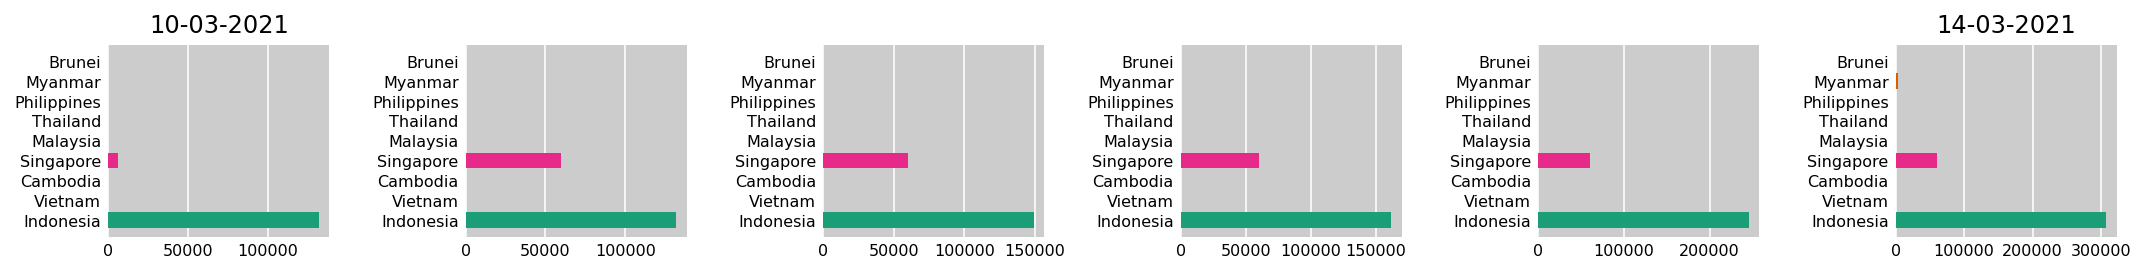

In [95]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(15, 2), dpi=144, tight_layout=True)
labels = dataFrame2_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded1.iloc[i]
    width = dataFrame2_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('10-03-2021')
ax_array[-1].set_title('14-03-2021');


In [96]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded1.iloc[i]
    width = dataFrame2_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    # dates = dfIndonesia_expanded['date']
    ax.set_title(f'Vaccinations in Asean Countries', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(dataFrame2_expanded), 
                     interval=100, repeat=False)

In [97]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

###**Vaccination in Asean Countries**

In [98]:
#@title A graph to depict vaccination with time
import bar_chart_race as bcr
bcr.bar_chart_race(dataFrame2_expanded, figsize=(4, 2.5), title='Vaccination in Asean Countries')

**Insight**

 With the threat of a second or a third wave in various countries, vaccines are emerging as the centrepiece of not only global recovery but also of global diplomacy. That is why ASEAN—or South East Asia—with its 700 million people and huge market, is at play in vaccine competition between the US, its Quad allies and China.

CHINA

China categorizes its vaccines as “public goods” and has promised priority access to ASEAN and African countries and provided vaccine aid to developing countries. For example, in Asia, China donated 1 million doses to Cambodia and 300,000 to Myanmar and Laos, as well as batches to Brunei and Nepal, among other countries. 

Moreover, Chinese vaccine diplomacy has been overwhelmingly bilateral to date. As China has delivered 5 million doses to 13 countries, with more on the way, its bilateral donations could exceed its contribution to COVID-19 Vaccines Global Access (COVAX), a global initiative to ensure equitable access to vaccines. 

In Africa, China has donated doses to Equatorial Guinea, Congo, and Sierra Leone, among others. In the Middle East, it has donated small amounts of vaccines to Iraq, Lebanon, and Syria. Yet these donations usually come later and in smaller amounts than its commercial contracts. For example, it donated 600,000 doses to the Philippines after the country ordered 25 million doses, 500,000 doses to Pakistan after it ordered 1.2 million doses, and 200,000 doses to Zimbabwe after it ordered 600,000 doses. While China is offering vaccine aid to 69 countries and exporting doses to 43 countries, the exported volume has been 100 times the volume of donations.

INDIA

India is among the world’s largest pharmaceutical manufacturers, producing around 60% of the world’s vaccines by volume.

The Serum Institute of India, the world’s largest vaccine manufacturer, signed a deal in April 2020 to produce 1 billion AstraZeneca-Oxford vaccine doses, half for domestic use and half for other low- and middle-income countries, charging only production costs.

India has actively engaged in bilateral and, to a lesser extent, multilateral vaccine diplomacy. Being a lower-middle-income country itself, India is a recipient rather than a contributor to the COVAX initiative. Yet as a major producer of the AstraZeneca-Oxford vaccine, it has pledged to deliver 240 million doses in the first half of 2021.

So far, India has supplied 6 million doses of vaccine aid and 29.4 million doses as commercial exports, including to major economies such as Brazil, Algeria, South Africa, and Egypt, as well as some countries that received vaccine donations, such as Myanmar and Bangladesh.

CONCLUSION

China and India differ in their strategies and tactics, they do operate in the same region, and their health diplomacy can intersect with other dimensions where they are more competitive or even confrontational. The dynamics between the two countries are also influenced by major powers outside the region. At the recent Quad Summit, for example, the United States, Japan, and Australia worked with India and pledged to supply up to 1 billion Covid-19 vaccine doses across Asia by the end of 2022 to counter China’s growing influence. If competition intensifies to the point that smaller countries must take sides, that will bring new uncertainties to the Indo-Pacific.

##**India's Vaccination Progress**

###**Loading Dataset**

In [126]:
dfCase = pd.read_csv("/content/case_time_series.csv")
dfSw = pd.read_csv("/content/state_wise.csv")
dfSt = pd.read_csv("/content/states.csv")
dfVac = pd.read_csv("/content/vaccine_doses_statewise.csv")
dfExp = pd.read_csv("/content/India_vac_export.csv")

###**Analysing Dataset**

In [127]:
dfCase

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
453,27 April 2021,2021-04-27,362913,17988788,262349,14807922,3286,200575
454,28 April 2021,2021-04-28,379404,18368192,274171,15082093,3646,204221
455,29 April 2021,2021-04-29,386773,18754965,291727,15373820,3502,207723
456,30 April 2021,2021-04-30,402014,19156979,299198,15673018,3525,211248


In [128]:
dfCase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             458 non-null    object
 1   Date_YMD         458 non-null    object
 2   Daily Confirmed  458 non-null    int64 
 3   Total Confirmed  458 non-null    int64 
 4   Daily Recovered  458 non-null    int64 
 5   Total Recovered  458 non-null    int64 
 6   Daily Deceased   458 non-null    int64 
 7   Total Deceased   458 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 28.8+ KB


In [129]:
dfSw

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,19549773,15981938,215524,3343860,2/5/2021 09:50:25,8451,TT,0,0,0,NaN
1,Maharashtra,4665754,3930302,69615,663758,01/05/2021 21:12:25,2079,MH,0,0,0,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Kerala,1606820,1277294,5357,323827,01/05/2021 20:08:31,342,KL,0,0,0,Mahe native who expired in Kannur included in ...
3,Karnataka,1564132,1143250,15794,405068,01/05/2021 20:08:33,20,KA,0,0,0,NaN
4,Andhra Pradesh,1121102,982297,8053,130752,01/05/2021 20:34:31,0,AP,0,0,0,NaN
5,Tamil Nadu,1186344,1054746,14193,117405,01/05/2021 20:34:36,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
6,Delhi,1174552,1061246,16559,96747,01/05/2021 23:16:25,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
7,Uttar Pradesh,1282504,967797,12874,301833,01/05/2021 20:34:39,0,UP,0,0,0,[Jan 1]:As no bulletin was provided for 31'st ...
8,West Bengal,845878,717772,11447,116659,01/05/2021 20:08:46,0,WB,0,0,0,NaN
9,Odisha,454607,391048,2107,61452,01/05/2021 20:08:48,0,OR,0,0,0,[July 12th] :20 non-covid deaths reported in s...


In [130]:
dfSw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   Confirmed          38 non-null     int64 
 2   Recovered          38 non-null     int64 
 3   Deaths             38 non-null     int64 
 4   Active             38 non-null     int64 
 5   Last_Updated_Time  38 non-null     object
 6   Migrated_Other     38 non-null     int64 
 7   State_code         38 non-null     object
 8   Delta_Confirmed    38 non-null     int64 
 9   Delta_Recovered    38 non-null     int64 
 10  Delta_Deaths       38 non-null     int64 
 11  State_Notes        14 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.7+ KB


In [131]:
dfSt

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
14908,2021-05-01,Tripura,35339,33622,395,23,709639.0
14909,2021-05-01,India,19549773,15981938,215524,8451,288337385.0
14910,2021-05-01,Uttar Pradesh,1282504,967797,12874,0,41064661.0
14911,2021-05-01,Uttarakhand,186014,128209,2731,3947,3815200.0


In [132]:
dfSt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14913 entries, 0 to 14912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14913 non-null  object 
 1   State      14913 non-null  object 
 2   Confirmed  14913 non-null  int64  
 3   Recovered  14913 non-null  int64  
 4   Deceased   14913 non-null  int64  
 5   Other      14913 non-null  int64  
 6   Tested     14150 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 815.7+ KB


In [133]:
dfVac

,State,16-01-2021,18-01-2021,19-01-2021,20-01-2021,21-01-2021,22-01-2021,23-01-2021,24-01-2021,25-01-2021,26-01-2021,27-01-2021,28-01-2021,29-01-2021,30-01-2021,31-01-2021,01-02-2021,02-02-2021,03-02-2021,04-02-2021,05-02-2021,06-02-2021,07-02-2021,08-02-2021,09-02-2021,10-02-2021,11-02-2021,12-02-2021,13-02-2021,14-02-2021,15-02-2021,16-02-2021,17-02-2021,18-02-2021,19-02-2021,20-02-2021,21-02-2021,22-02-2021,23-02-2021,24-02-2021,...,22-03-2021,23-03-2021,24-03-2021,25-03-2021,26-03-2021,27-03-2021,28-03-2021,29-03-2021,30-03-2021,31-03-2021,01-04-2021,02-04-2021,03-04-2021,04-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,10-04-2021,11-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021,16-04-2021,17-04-2021,18-04-2021,19-04-2021,20-04-2021,21-04-2021,22-04-2021,23-04-2021,24-04-2021,25-04-2021,26-04-2021,27-04-2021,28-04-2021,29-04-2021,30-04-2021
0,Andaman and Nicobar Islands,225,442,644,644,1032,1466,1998,2019,2369,2369,2385,2656,2727,2727,2727,2727,2727,2772,2938,3161,3161,3397,3397,3413,3413,3454,3454,3646,3646,4029,4029,4227,4842,5348,6152,6152,7312,7583,7762,...,18990,19752,20002,20672,20991,21361,21361,21361,22088,22088,22874,22867,23432,24076,25217,26850,28269,30799,33217,35447,37671,42285,48901,55598,60898,67734,74108,78236,83085,86926,89072,91977,94166,96109,97392,99109,100588,101770,102998,104374
1,Andhra Pradesh,18412,46680,58495,91778,115365,133298,147030,147030,156120,156129,163727,171683,179038,187252,187252,187252,187252,215171,243243,272190,299649,299649,314316,325538,335268,343813,351993,362341,362341,376444,390665,411783,438766,469815,493471,503323,529820,556810,592903,...,1741878,1850350,1972034,2113981,2219053,2341955,2350279,2408323,2504479,2605169,2735502,2907602,3007468,3053542,3179087,3266611,3389990,3497015,3571233,3806708,3893003,3913719,3918529,4563073,4597577,4603804,4607975,4613024,4756984,4927736,4968504,5330080,5555014,5670368,5678628,5986822,6177974,6282487,6354053,6579817
2,Arunachal Pradesh,829,2805,2805,3023,4682,5956,6511,6511,7307,7307,7307,8656,9265,9651,9651,9791,9791,9846,10889,11834,12346,12346,13479,13480,13480,14322,15098,16094,16094,18187,18187,18187,21300,23559,23743,23743,26650,27916,27930,...,73426,75474,75593,78893,81533,83450,83450,83808,85889,85889,93159,100226,104436,106266,107592,112266,114031,120397,126477,131304,135099,144244,151893,158211,161283,166715,170942,172669,180287,186071,190500,197578,204542,209180,210345,216946,222159,227858,234727,241483
3,Assam,3528,5542,7418,7585,10676,13881,13881,13881,19837,19837,19945,28918,36932,38106,38106,39724,42435,43607,60556,77225,87269,88585,99889,108887,110977,117607,125038,129781,129873,132475,135419,137224,146748,157532,164309,165804,179102,190374,195420,...,678659,810619,837127,926350,986804,1004038,1004248,1006703,1039302,1048974,1083743,1167124,1206058,1220939,1276382,1320944,1344908,1405680,1454577,1486294,1498729,1531037,1550113,1553903,1555461,1564490,1586438,1597535,1677769,1771560,1825312,1900839,1961751,2006178,2020742,2105788,2193900,2244119,2351160,2484613
4,Bihar,18169,33389,42085,47433,63541,63620,76125,76125,88450,88450,89074,107174,110396,146015,148293,184215,222153,264097,312339,354360,374538,380229,397555,415989,430307,448903,471683,491233,492152,509026,510485,518095,540107,550433,561343,561857,582950,592457,600795,...,2013059,2137083,2245036,2381773,2519873,2634237,2634237,2634237,2711697,2834138,3045053,3121393,3232560,3374210,3581314,3885397,4026169,4167453,4233789,4494404,4748226,4954731,5050288,5227880,5356134,5428037,5579469,5687553,5838127,5965675,6057811,6171493,6271746,6362286,6437482,6558814,6662906,6762510,6870911,6968234
5,Chandigarh,265,265,469,469,753,1157,1502,1502,1928,1928,2355,2764,2977,3447,3447,3803,4019,4399,4782,5234,5645,5645,6027,6458,6903,7374,8017,8803,8803,9356,10008,10860,11804,12647,13748,13748,15287,17003,18562,...,66213,67704,69333,71036,72714,74230,74323,74323,75953,77581,81080,84815,88663,91346,94887,98293,101739,105815,110149,115008,118155,122941,126849,13038

In [134]:
dfVac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 105 entries, State to 30-04-2021
dtypes: float64(1), int64(103), object(1)
memory usage: 30.5+ KB


In [135]:
dfExp

,Country,Total Vaccines
0,Bangladesh,103.000
1,Myanmar,37.000
2,Nepal,24.480
3,Bhutan,5.500
4,Maldives,3.120
...,...,...
90,Comoros,0.120
91,Cameroon,3.912
92,Mauritania,0.696
93,Albania,0.500


In [136]:
dfExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         95 non-null     object 
 1   Total Vaccines  95 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


###**Cleaning Dataset**

In [137]:
dfCase = dfCase.drop(['Date'],axis=1)

In [138]:
dfCase

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
453,2021-04-27,362913,17988788,262349,14807922,3286,200575
454,2021-04-28,379404,18368192,274171,15082093,3646,204221
455,2021-04-29,386773,18754965,291727,15373820,3502,207723
456,2021-04-30,402014,19156979,299198,15673018,3525,211248


In [139]:
dfSw = dfSw.drop(['Last_Updated_Time','Migrated_Other','Delta_Confirmed','Delta_Recovered','Delta_Deaths','State_Notes'],axis=1)

In [140]:
dfSw

,State,Confirmed,Recovered,Deaths,Active,State_code
0,Total,19549773,15981938,215524,3343860,TT
1,Maharashtra,4665754,3930302,69615,663758,MH
2,Kerala,1606820,1277294,5357,323827,KL
3,Karnataka,1564132,1143250,15794,405068,KA
4,Andhra Pradesh,1121102,982297,8053,130752,AP
5,Tamil Nadu,1186344,1054746,14193,117405,TN
6,Delhi,1174552,1061246,16559,96747,DL
7,Uttar Pradesh,1282504,967797,12874,301833,UP
8,West Bengal,845878,717772,11447,116659,WB
9,Odisha,454607,391048,2107,61452,OR


In [141]:
dfSt = dfSt.drop(['Other','Tested'],axis=1)

In [142]:
dfSt

,Date,State,Confirmed,Recovered,Deceased
0,2020-01-30,Kerala,1,0,0
1,2020-01-30,India,1,0,0
2,2020-02-02,Kerala,2,0,0
3,2020-02-02,India,2,0,0
4,2020-02-03,Kerala,3,0,0
...,...,...,...,...,...
14908,2021-05-01,Tripura,35339,33622,395
14909,2021-05-01,India,19549773,15981938,215524
14910,2021-05-01,Uttar Pradesh,1282504,967797,12874
14911,2021-05-01,Uttarakhand,186014,128209,2731


In [143]:
# dfvac and dfExp are unchanged

In [144]:
dfVac

,State,16-01-2021,18-01-2021,19-01-2021,20-01-2021,21-01-2021,22-01-2021,23-01-2021,24-01-2021,25-01-2021,26-01-2021,27-01-2021,28-01-2021,29-01-2021,30-01-2021,31-01-2021,01-02-2021,02-02-2021,03-02-2021,04-02-2021,05-02-2021,06-02-2021,07-02-2021,08-02-2021,09-02-2021,10-02-2021,11-02-2021,12-02-2021,13-02-2021,14-02-2021,15-02-2021,16-02-2021,17-02-2021,18-02-2021,19-02-2021,20-02-2021,21-02-2021,22-02-2021,23-02-2021,24-02-2021,...,22-03-2021,23-03-2021,24-03-2021,25-03-2021,26-03-2021,27-03-2021,28-03-2021,29-03-2021,30-03-2021,31-03-2021,01-04-2021,02-04-2021,03-04-2021,04-04-2021,05-04-2021,06-04-2021,07-04-2021,08-04-2021,09-04-2021,10-04-2021,11-04-2021,12-04-2021,13-04-2021,14-04-2021,15-04-2021,16-04-2021,17-04-2021,18-04-2021,19-04-2021,20-04-2021,21-04-2021,22-04-2021,23-04-2021,24-04-2021,25-04-2021,26-04-2021,27-04-2021,28-04-2021,29-04-2021,30-04-2021
0,Andaman and Nicobar Islands,225,442,644,644,1032,1466,1998,2019,2369,2369,2385,2656,2727,2727,2727,2727,2727,2772,2938,3161,3161,3397,3397,3413,3413,3454,3454,3646,3646,4029,4029,4227,4842,5348,6152,6152,7312,7583,7762,...,18990,19752,20002,20672,20991,21361,21361,21361,22088,22088,22874,22867,23432,24076,25217,26850,28269,30799,33217,35447,37671,42285,48901,55598,60898,67734,74108,78236,83085,86926,89072,91977,94166,96109,97392,99109,100588,101770,102998,104374
1,Andhra Pradesh,18412,46680,58495,91778,115365,133298,147030,147030,156120,156129,163727,171683,179038,187252,187252,187252,187252,215171,243243,272190,299649,299649,314316,325538,335268,343813,351993,362341,362341,376444,390665,411783,438766,469815,493471,503323,529820,556810,592903,...,1741878,1850350,1972034,2113981,2219053,2341955,2350279,2408323,2504479,2605169,2735502,2907602,3007468,3053542,3179087,3266611,3389990,3497015,3571233,3806708,3893003,3913719,3918529,4563073,4597577,4603804,4607975,4613024,4756984,4927736,4968504,5330080,5555014,5670368,5678628,5986822,6177974,6282487,6354053,6579817
2,Arunachal Pradesh,829,2805,2805,3023,4682,5956,6511,6511,7307,7307,7307,8656,9265,9651,9651,9791,9791,9846,10889,11834,12346,12346,13479,13480,13480,14322,15098,16094,16094,18187,18187,18187,21300,23559,23743,23743,26650,27916,27930,...,73426,75474,75593,78893,81533,83450,83450,83808,85889,85889,93159,100226,104436,106266,107592,112266,114031,120397,126477,131304,135099,144244,151893,158211,161283,166715,170942,172669,180287,186071,190500,197578,204542,209180,210345,216946,222159,227858,234727,241483
3,Assam,3528,5542,7418,7585,10676,13881,13881,13881,19837,19837,19945,28918,36932,38106,38106,39724,42435,43607,60556,77225,87269,88585,99889,108887,110977,117607,125038,129781,129873,132475,135419,137224,146748,157532,164309,165804,179102,190374,195420,...,678659,810619,837127,926350,986804,1004038,1004248,1006703,1039302,1048974,1083743,1167124,1206058,1220939,1276382,1320944,1344908,1405680,1454577,1486294,1498729,1531037,1550113,1553903,1555461,1564490,1586438,1597535,1677769,1771560,1825312,1900839,1961751,2006178,2020742,2105788,2193900,2244119,2351160,2484613
4,Bihar,18169,33389,42085,47433,63541,63620,76125,76125,88450,88450,89074,107174,110396,146015,148293,184215,222153,264097,312339,354360,374538,380229,397555,415989,430307,448903,471683,491233,492152,509026,510485,518095,540107,550433,561343,561857,582950,592457,600795,...,2013059,2137083,2245036,2381773,2519873,2634237,2634237,2634237,2711697,2834138,3045053,3121393,3232560,3374210,3581314,3885397,4026169,4167453,4233789,4494404,4748226,4954731,5050288,5227880,5356134,5428037,5579469,5687553,5838127,5965675,6057811,6171493,6271746,6362286,6437482,6558814,6662906,6762510,6870911,6968234
5,Chandigarh,265,265,469,469,753,1157,1502,1502,1928,1928,2355,2764,2977,3447,3447,3803,4019,4399,4782,5234,5645,5645,6027,6458,6903,7374,8017,8803,8803,9356,10008,10860,11804,12647,13748,13748,15287,17003,18562,...,66213,67704,69333,71036,72714,74230,74323,74323,75953,77581,81080,84815,88663,91346,94887,98293,101739,105815,110149,115008,118155,122941,126849,13038

In [145]:
dfExp

,Country,Total Vaccines
0,Bangladesh,103.000
1,Myanmar,37.000
2,Nepal,24.480
3,Bhutan,5.500
4,Maldives,3.120
...,...,...
90,Comoros,0.120
91,Cameroon,3.912
92,Mauritania,0.696
93,Albania,0.500


###**Visualisation**

**India's Total Case Load**

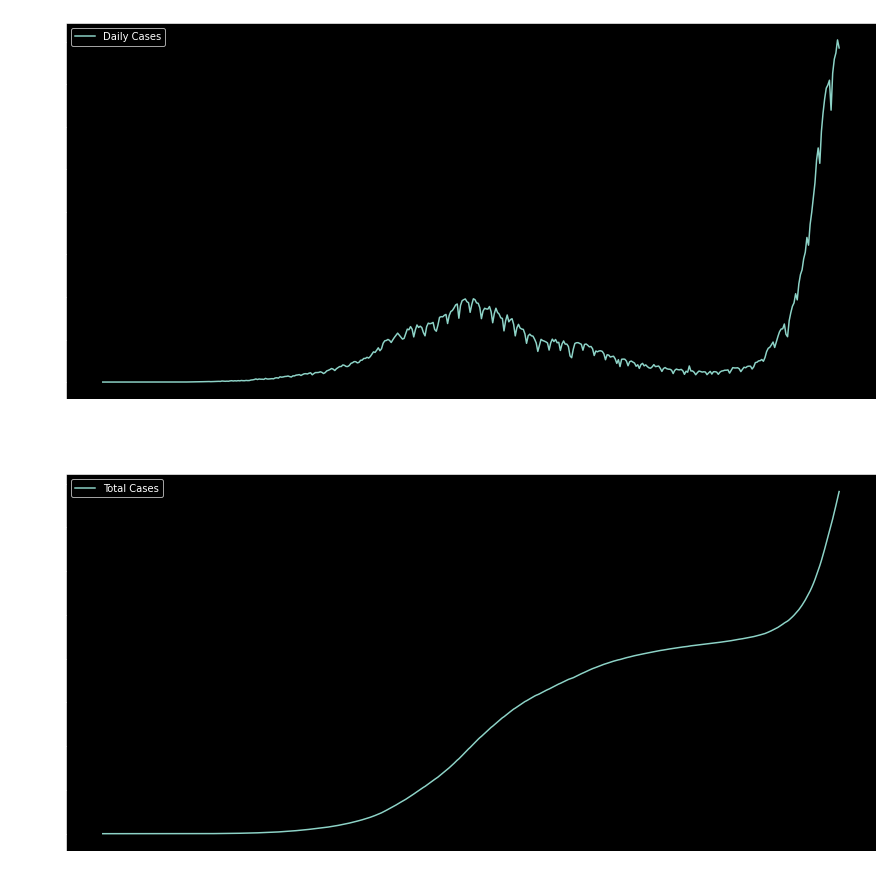

In [146]:
#@title 
plt.style.use("dark_background")
Date=dfCase['Date_YMD']
Tcases=dfCase['Total Confirmed']
Dcases=dfCase['Daily Confirmed']

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
ax1.plot(Date, Dcases, label='Daily Cases')
ax2.plot(Date, Tcases, label='Total Cases')

ax1.legend()
ax1.set_title("India's Daily Covid Case Load")
ax1.set_xlabel('Date')
ax1.set_ylabel('Number Of Cases')
ax1.set_xticklabels([])

ax2.legend()
ax2.set_title("India's Total Covid Case Load")
ax2.set_xlabel('Date')
ax2.set_ylabel('Number Of Cases')
ax2.set_xticklabels([])

plt.subplots_adjust(right=2, top=3)
# plt.tight_layout()
plt.show()

**India's Recovery Record**

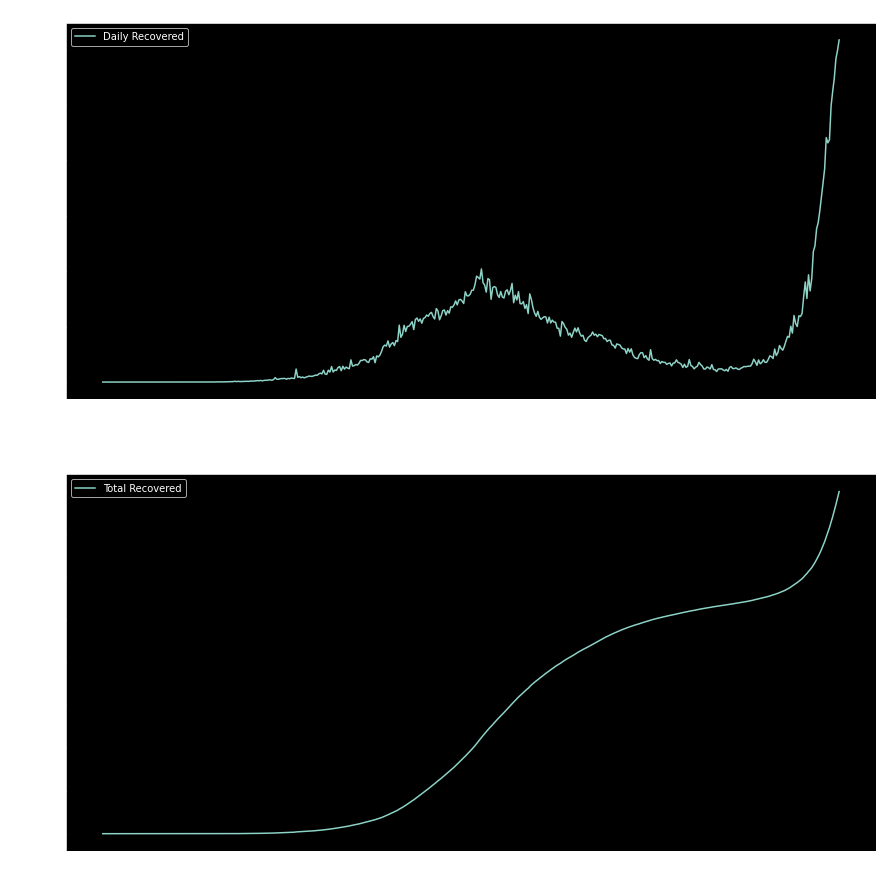

In [147]:
#@title 
plt.style.use("dark_background")
Date=dfCase['Date_YMD']
Trec=dfCase['Total Recovered']
Drec=dfCase['Daily Recovered']

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
ax1.plot(Date, Drec, label='Daily Recovered')
ax2.plot(Date, Trec, label='Total Recovered')

ax1.legend()
ax1.set_title("India's Daily Recovery Record")
ax1.set_xlabel('Date')
ax1.set_ylabel('Number Of People Recovered')
ax1.set_xticklabels([])

ax2.legend()
ax2.set_title("India's Total Recovery Record")
ax2.set_xlabel('Date')
ax2.set_ylabel('Number Of People Recovered')
ax2.set_xticklabels([])

plt.subplots_adjust(right=2, top=3)
# plt.tight_layout()
plt.show()

**India's Mortality Situation**

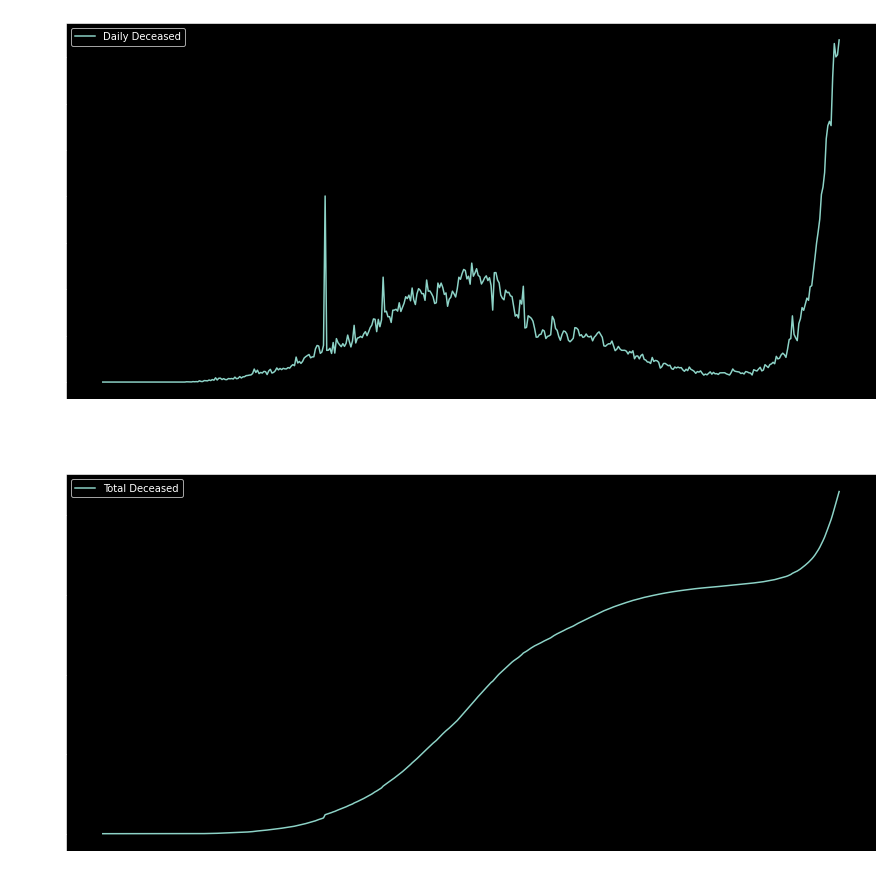

In [148]:
#@title 
plt.style.use("dark_background")
Date=dfCase['Date_YMD']
Tdet=dfCase['Total Deceased']
Ddet=dfCase['Daily Deceased']

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
ax1.plot(Date, Ddet, label='Daily Deceased')
ax2.plot(Date, Tdet, label='Total Deceased')

ax1.legend()
ax1.set_title("India's Daily Death Toll")
ax1.set_xlabel('Date')
ax1.set_ylabel('Number Of People Deceased')
ax1.set_xticklabels([])

ax2.legend()
ax2.set_title("India's Total Death Toll")
ax2.set_xlabel('Date')
ax2.set_ylabel('Number Of People Deceased')
ax2.set_xticklabels([])

plt.subplots_adjust(right=2, top=3)
# plt.tight_layout()
plt.show()

**State Wise Confirmed Cases(Relevent 20)** 



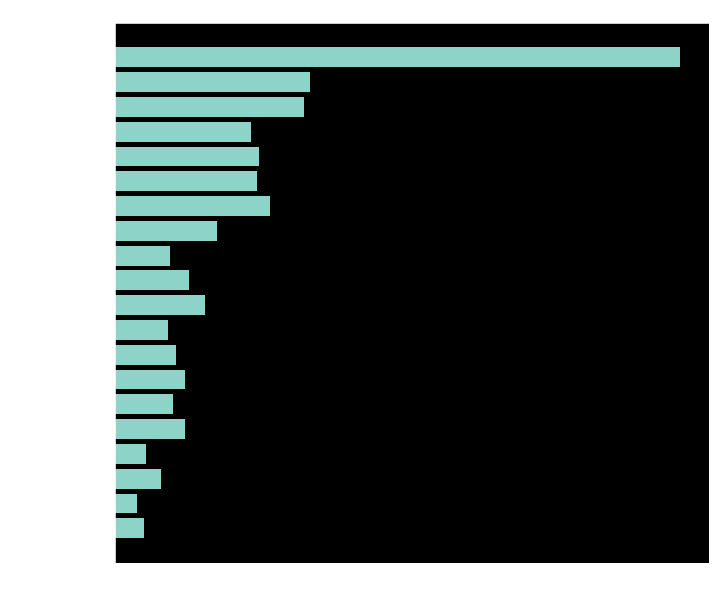

In [149]:
#@title
plt.style.use("dark_background")
# plt.xkcd(False)
# plt.rcdefaults()
state = []
for i in range(1,21):
  state.append(dfSw['State'][i])

cases = []
for i in range(1,21):
  cases.append(dfSw['Confirmed'][i])

cases.reverse()  
state.reverse() 
plt.barh(state, cases)
plt.title("State Wise Cases")
plt.xlabel("Number Of Covid Cases   (scale = num*10 Lakhs)")
plt.subplots_adjust(right=1.5, top=2)
# plt.figure(figsize=(250, 250), dpi=144)
plt.show()

**State Wise Active cases(Relevent 20)**

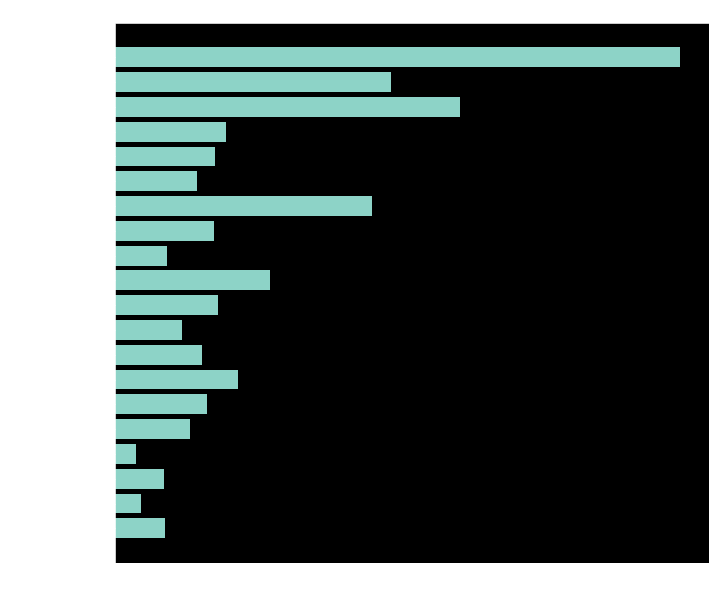

In [150]:
#@title 
plt.style.use("dark_background")
# plt.xkcd(False)
# plt.rcdefaults()
state = []
for i in range(1,21):
  state.append(dfSw['State'][i])

act_cases = []
for i in range(1,21):
  act_cases.append(dfSw['Active'][i])

act_cases.reverse()  
state.reverse() 
plt.barh(state, act_cases)
plt.title("State Wise Cases")
plt.xlabel("Number Of Active Covid Cases   (scale = num*1 lakh)")
plt.subplots_adjust(right=1.5, top=2)
# plt.figure(figsize=(250, 250), dpi=144)
# plt.tight_layout()
plt.show()

**State Wise Vaccination Progress**

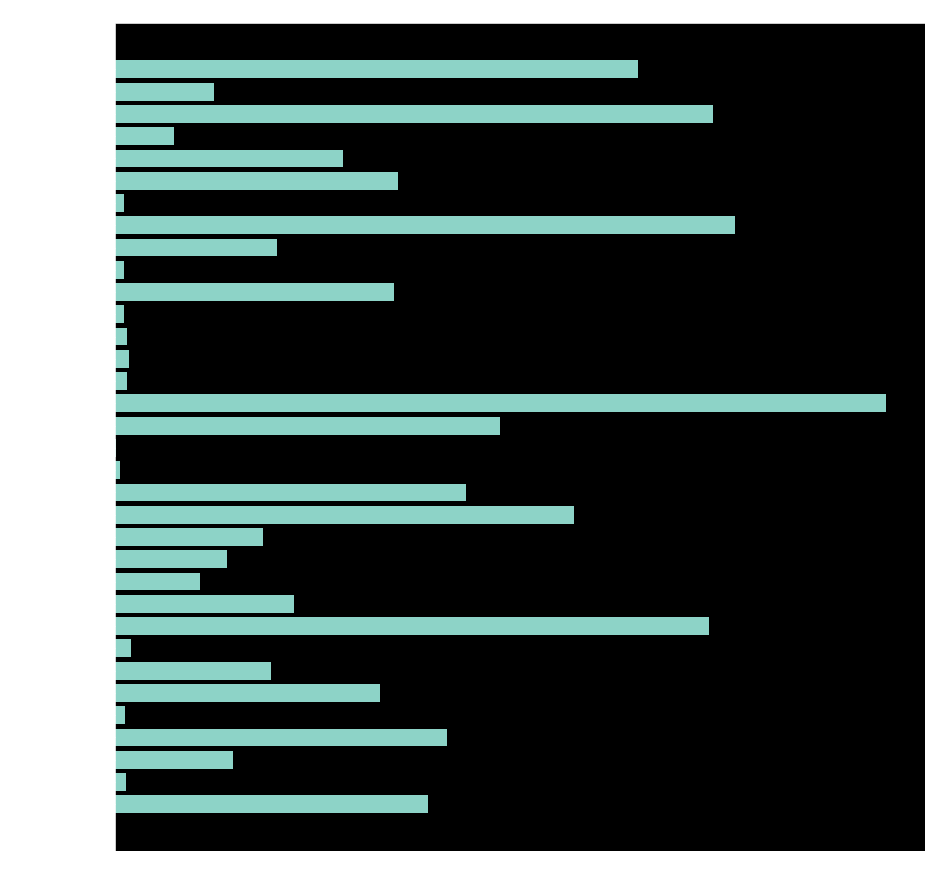

In [151]:
#@title 
plt.style.use("dark_background")
# plt.xkcd(False)
# plt.rcdefaults()
state = []
for i in range(1,35):
  state.append(dfVac['State'][i])

act_cases = []
for i in range(1,35):
  act_cases.append(dfVac['30-04-2021'][i])

# act_cases.reverse()  
# state.reverse() 
plt.barh(state, act_cases)
plt.title("State Wise Vaccination")
plt.xlabel("Number Of Vaccine Doses Administered   (scale = num*100 lakh)")
plt.subplots_adjust(right=2, top=3)
# plt.figure(figsize=(250, 250), dpi=144)
# plt.tight_layout()
plt.show()

**India's Vaccine Export Report**

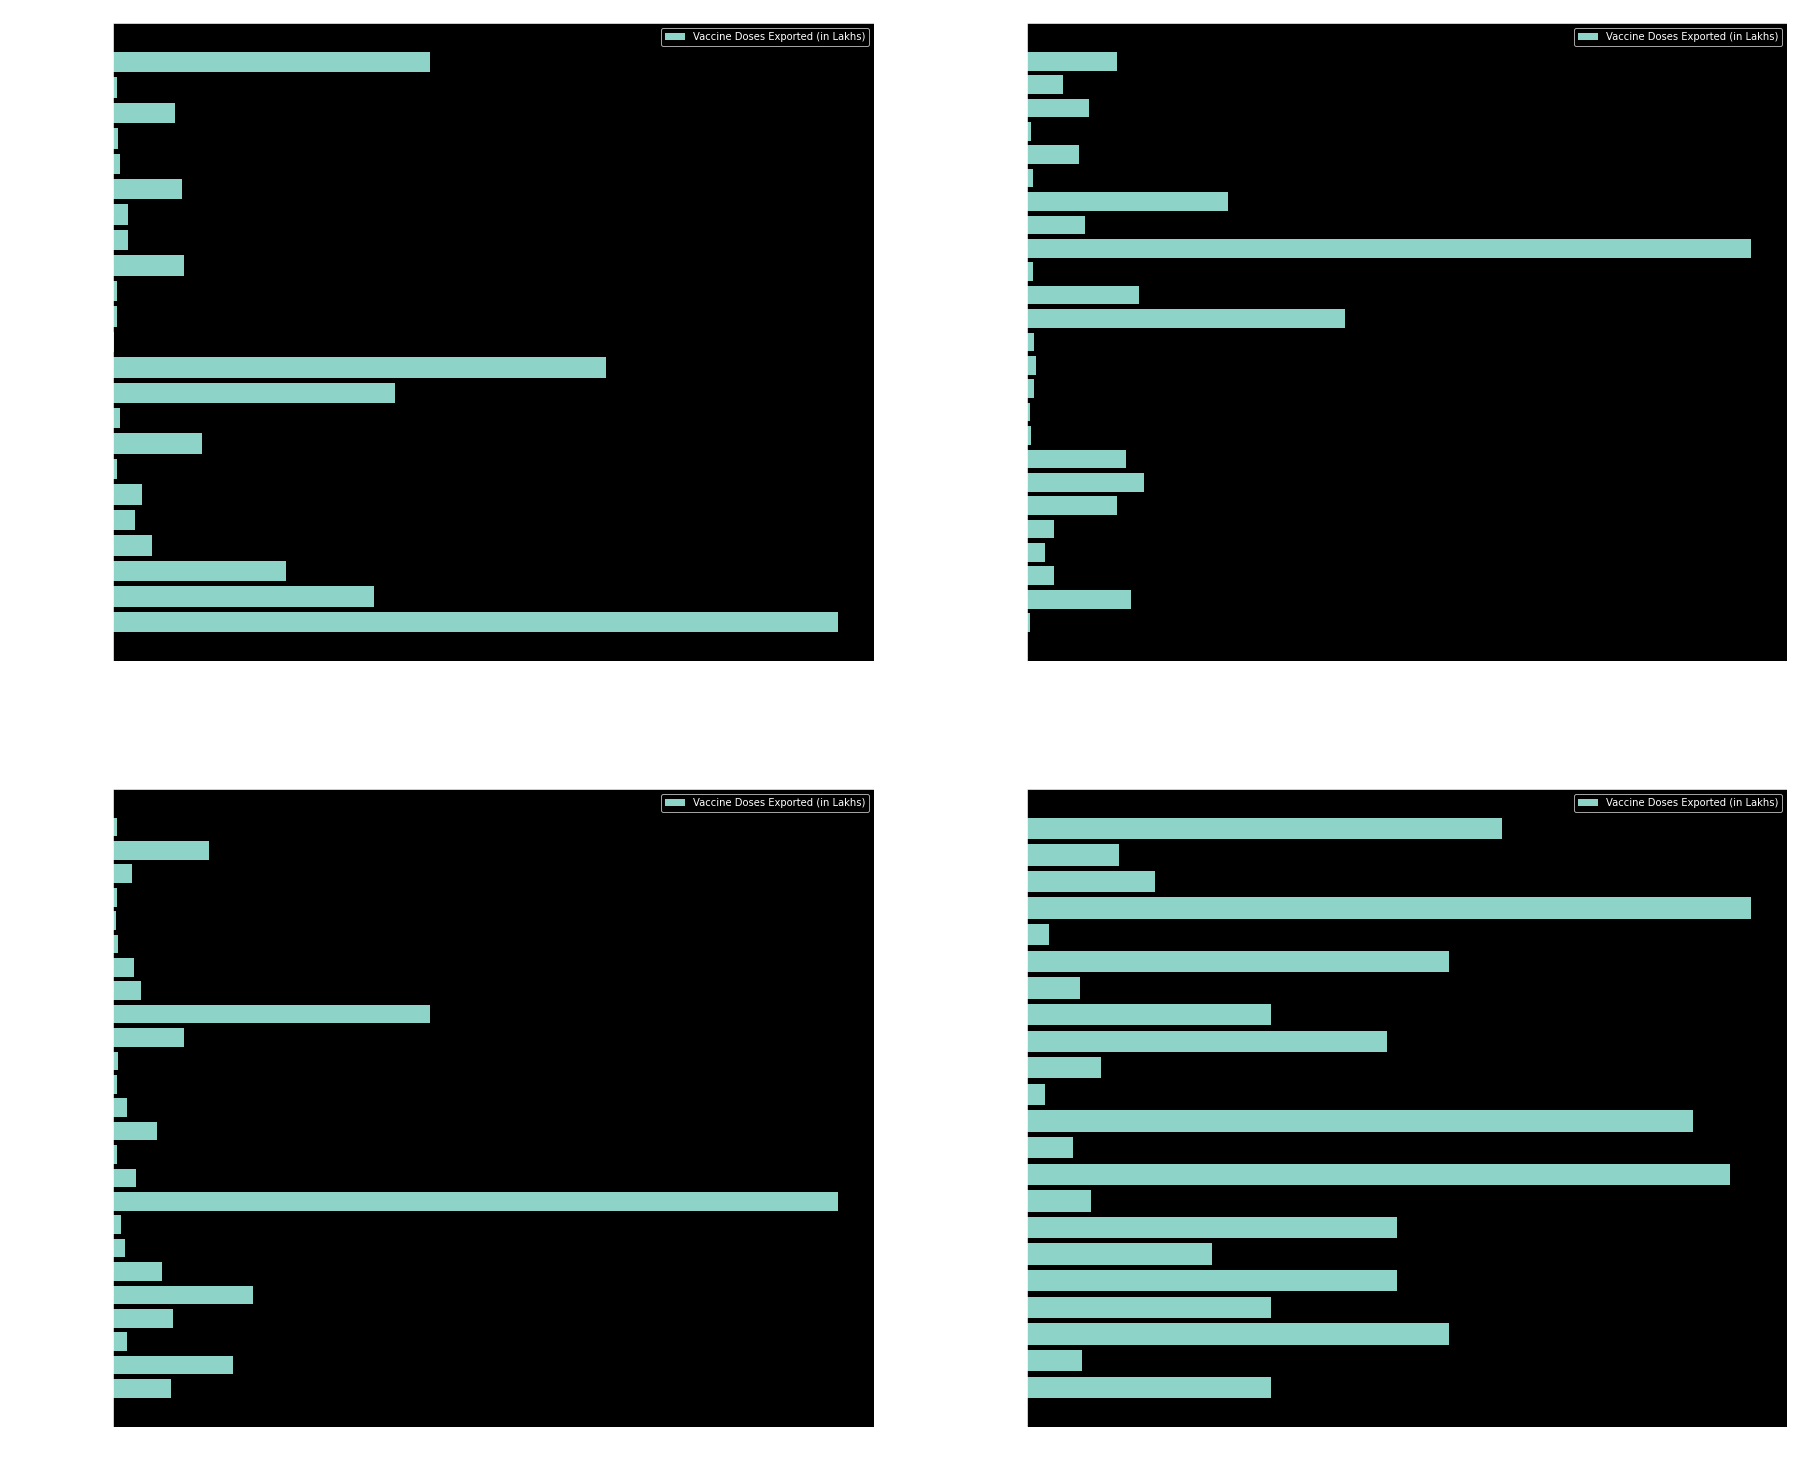

In [152]:
#@title 
plt.style.use("dark_background")

con1 = []
for i in range(0,23):
  con1.append(dfExp['Country'][i])

vac1 = []
for i in range(0,23):
  vac1.append(dfExp['Total Vaccines'][i])

con2 = []
for i in range(23,48):
  con2.append(dfExp['Country'][i])

vac2 = []
for i in range(23,48):
  vac2.append(dfExp['Total Vaccines'][i])

con3 = []
for i in range(48,73):
  con3.append(dfExp['Country'][i])

vac3 = []
for i in range(48,73):
  vac3.append(dfExp['Total Vaccines'][i])

con4 = []
for i in range(73,95):
  con4.append(dfExp['Country'][i])

vac4 = []
for i in range(73,95):
  vac4.append(dfExp['Total Vaccines'][i])


fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(nrows=2,ncols=2)
ax1.barh(con1,vac1, label='Vaccine Doses Exported (in Lakhs)')
ax2.barh(con2,vac2, label='Vaccine Doses Exported (in Lakhs)')
ax3.barh(con3,vac3, label='Vaccine Doses Exported (in Lakhs)')
ax4.barh(con4,vac4, label='Vaccine Doses Exported (in Lakhs)')


ax1.legend()
ax1.set_title("Vaccines Exported By India")
ax1.set_xlabel('No. Of Vaccines Exported')

ax2.legend()
ax2.set_title("Vaccines Exported By India")
ax2.set_xlabel('No. Of Vaccines Exported')

ax3.legend()
ax3.set_title("Vaccines Exported By India")
ax3.set_xlabel('No. Of Vaccines Exported')

ax4.legend()
ax4.set_title("Vaccines Exported By India")
ax4.set_xlabel('No. Of Vaccines Exported')

plt.subplots_adjust(right=4, top=5)
# plt.tight_layout()
plt.show()

**Insight**

While India was not a part of the initial research and development efforts, it was a foregone conclusion that it would eventually have a significant role to play in vaccine manufacturing and development. India is known as the “pharmacy of the world,” and manufactures about 60 percent of all the world’s vaccines. India is also home to the Serum Institute of India, which is the world’s largest vaccine manufacturer. The Serum Institute has signed multiple deals with vaccine developers, including with Oxford-AstraZeneca and Novavax.

With the Serum Institute selling doses around the world, the door is wide open for India to play a constructive role in ensuring the world gets vaccinated, especially as higher income countries focus on taking care of their own citizens first. And, with India in competition with China in the immediate neighborhood, India can effectively use vaccines as a mechanism to pushback against Chinese influence.

